In [1]:
import nltk
import numpy as np
import collections
DEMENTIA_PATH = "../data/dementia_origin.txt"
CONTROL_PATH = "../data/control_origin.txt"

In [2]:
# read dementia and control dialogue data
dialogue_dict = {}
with open(DEMENTIA_PATH, encoding='utf8') as f:
    dialogue_corpus = f.readlines()
f.close()
for i in range(len(dialogue_corpus)):
    if i % 2 == 0:
        dialogue_dict[dialogue_corpus[i].strip('\n')] = dialogue_corpus[i+1].strip('\n')
with open(CONTROL_PATH, encoding='utf8') as f:
    dialogue_corpus = f.readlines()
f.close()
for i in range(len(dialogue_corpus)):
    if i % 2 == 0:
        dialogue_dict[dialogue_corpus[i].strip('\n')] = dialogue_corpus[i+1].strip('\n')
print("Size of control & dementia corpus: {}".format(len(dialogue_dict)))

Size of control & dementia corpus: 102


In [4]:
import ckip
segmenter = ckip.CkipSegmenter()
dialogue_seg = []
for key, sent in dialogue_dict.items():
    sent_seg = segmenter.seg(sent)
#     sent_seg.insert(0,'<s>')
#     sent_seg.append('</s>')
    dialogue_seg.append(sent_seg.tok)


In [6]:
dialogue_token = []
for i in dialogue_seg:
    dialogue_token.append(len(i))
print(dialogue_token)

[175, 24, 27, 68, 65, 21, 44, 152, 124, 34, 53, 32, 70, 47, 40, 41, 42, 99, 41, 32, 43, 67, 14, 78, 20, 75, 73, 63, 81, 57, 50, 62, 42, 73, 52, 66, 22, 49, 16, 79, 46, 68, 53, 26, 93, 81, 77, 43, 61, 55, 66, 36, 33, 108, 25, 58, 58, 36, 39, 40, 75, 35, 62, 155, 96, 83, 68, 23, 132, 64, 59, 31, 72, 37, 34, 96, 159, 45, 65, 206, 71, 66, 43, 66, 44, 61, 99, 34, 65, 43, 107, 70, 40, 20, 56, 116, 54, 84, 67, 41, 24, 58]


/home/yyliu/anaconda3/envs/NLP/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


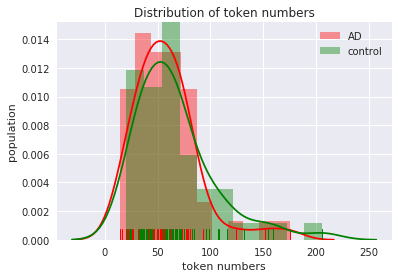

In [8]:
dialogue_token_dementia = np.asarray(dialogue_token[:52])
dialogue_token_control = np.asarray(dialogue_token[52:])

import matplotlib.pyplot as plt
import seaborn
seaborn.set()
seaborn.distplot(dialogue_token_dementia, color='r', label='AD', rug=True)
seaborn.distplot(dialogue_token_control, color='g', label='control', rug=True)
plt.title('Distribution of token numbers')
plt.xlabel('token numbers')
plt.ylabel('population')
plt.legend()
plt.show()

In [9]:
import cluster

In [10]:
my_cluster = cluster.Cluster()
my_cluster.syntactic_analysis('ckip')

Load word2vec model sucess ...
Number of token: 259638
Dimensions of word vector: 500
Load sentence text data ...
Syntactic analysis ok ...


In [12]:
n_list = [r[0] for r in my_cluster.syntactic_feature]
v_list = [r[1] for r in my_cluster.syntactic_feature]
a_list = [r[2] for r in my_cluster.syntactic_feature]
pronoun_list = [r[3] for r in my_cluster.syntactic_feature]

/home/yyliu/anaconda3/envs/NLP/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


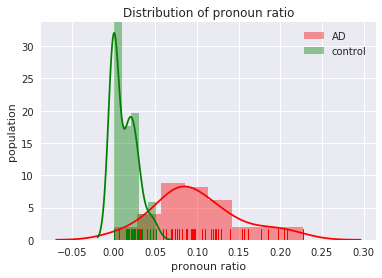

In [13]:
pronoun_d = np.asarray(pronoun_list[:52])
pronoun_c = np.asarray(pronoun_list[52:])
seaborn.set()
seaborn.distplot(pronoun_d, color='r', label='AD', rug=True)
seaborn.distplot(pronoun_c, color='g', label='control', rug=True)
plt.title('Distribution of pronoun ratio')
plt.xlabel('pronoun ratio')
plt.ylabel('population')
plt.legend()
plt.show()

/home/yyliu/anaconda3/envs/NLP/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


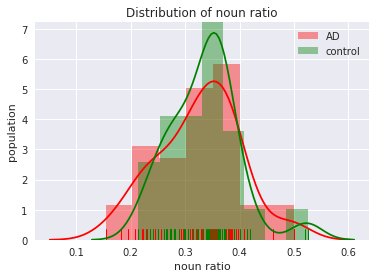

In [14]:
n_d = np.asarray(n_list[:52])
n_c = np.asarray(n_list[52:])
seaborn.set()
seaborn.distplot(n_d, color='r', label='AD', rug=True)
seaborn.distplot(n_c, color='g', label='control', rug=True)
plt.title('Distribution of noun ratio')
plt.xlabel('noun ratio')
plt.ylabel('population')
plt.legend()
plt.show()

/home/yyliu/anaconda3/envs/NLP/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


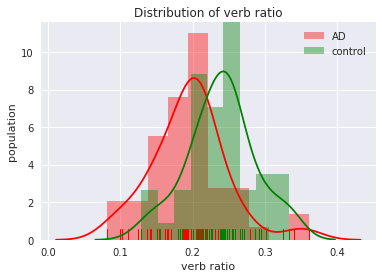

In [15]:
v_d = np.asarray(v_list[:52])
v_c = np.asarray(v_list[52:])
seaborn.set()
seaborn.distplot(v_d, color='r', label='AD', rug=True)
seaborn.distplot(v_c, color='g', label='control', rug=True)
plt.title('Distribution of verb ratio')
plt.xlabel('verb ratio')
plt.ylabel('population')
plt.legend()
plt.show()

In [18]:
my_cluster.prior_semantic_analysis('ckip')
ttr_list = my_cluster.prior_semantic_feature
ttr_d = np.asarray(ttr_list[:52])
ttr_c = np.asarray(ttr_list[52:])
seaborn.set()
seaborn.distplot(ttr_d, color='r', label='AD', rug=True)
seaborn.distplot(ttr_c, color='g', label='cotrol', rug=True)
plt.title('Distribution of type token ratio')
plt.xlabel('type token ratio')
plt.ylabel('population')
plt.legend()
plt.ylim(0,6)
plt.show()

KeyboardInterrupt: 

In [20]:
import pickle
with open('ckip_AD_control_seg.pickle', 'wb') as f:
    pickle.dump(dialogue_seg, f)

In [21]:
with open('ckip_AD_control_pos_scroe.pickle', 'wb') as f:
    pickle.dump(my_cluster.syntactic_feature, f)